In [2]:
import numpy as np
import pandas as pd

movies_df=pd.read_csv('movies.csv',usecols=['movieId','title'])
ratings_df=pd.read_csv('ratings.csv',usecols=['userId','movieId','rating'])

In [15]:
movies_df

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [16]:
ratings_df['userId']

0           1
1           1
2           1
3           1
4           1
         ... 
100831    610
100832    610
100833    610
100834    610
100835    610
Name: userId, Length: 100836, dtype: int64

In [17]:
final_df=pd.merge(movies_df,ratings_df,on='movieId')
final_df

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),184,4.0
100832,193583,No Game No Life: Zero (2017),184,3.5
100833,193585,Flint (2017),184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5


In [18]:
df=pd.DataFrame(final_df.groupby('title')['rating'].mean().sort_values(ascending=False)).rename(columns={'rating':'avg_rating'})
df

,avg_rating
title,
Karlson Returns (1970),5.0
Winter in Prostokvashino (1984),5.0
My Love (2006),5.0
Sorority House Massacre II (1990),5.0
Winnie the Pooh and the Day of Concern (1972),5.0
...,...
The Beast of Hollow Mountain (1956),0.5
"Follow Me, Boys! (1966)",0.5
The Butterfly Effect 3: Revelations (2009),0.5


In [19]:
df['no_rating']=final_df.groupby('title')['rating'].count()
df

,avg_rating,no_rating
title,,
Karlson Returns (1970),5.0,1
Winter in Prostokvashino (1984),5.0,1
My Love (2006),5.0,1
Sorority House Massacre II (1990),5.0,1
Winnie the Pooh and the Day of Concern (1972),5.0,1
...,...,...
The Beast of Hollow Mountain (1956),0.5,1
"Follow Me, Boys! (1966)",0.5,1
The Butterfly Effect 3: Revelations (2009),0.5,1


# Let's visualise data

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

C:\Users\subh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_rating'>

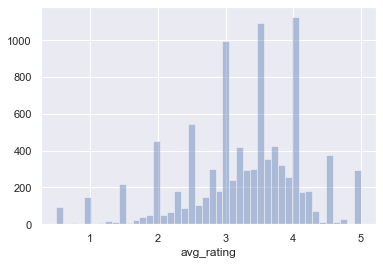

In [22]:
sns.distplot(df['avg_rating'],kde=False)

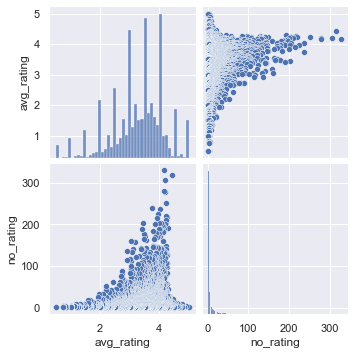

In [23]:
sns.pairplot(df)

C:\Users\subh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


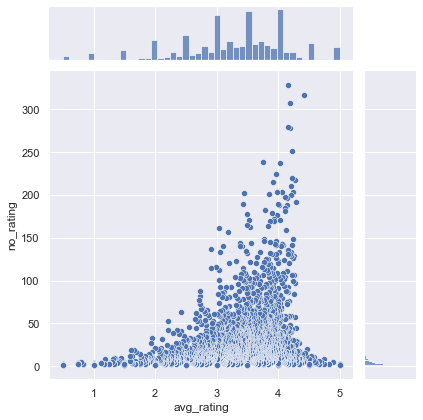

In [24]:
sns.jointplot(df['avg_rating'],df['no_rating'])

# Algorithm to recommend

In [9]:
columns = list(range(1, 251))
rows =list(range(1, 3960))
Y = pd.DataFrame(0, index=rows, columns=columns)
R = pd.DataFrame(0, index=rows, columns=columns)
for index, row in ratings_df.iterrows():
    Y.at[row['movieId'],row['userId']] = row['rating']
    R.at[row['movieId'],row['userId']] = 1   


In [10]:
##Cost function
def cofiCostFunc(params, Y, R, num_users, num_movies,
                      num_features, lambda_=0.0):
    print('Trainig.......wait.....')
    # Unfold the U and W matrices from params
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, num_features)

    # You need to return the following values correctly
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)

    # ====================== YOUR CODE HERE ======================
    J =np.sum(np.multiply(R ,(X.dot(Theta.T) - Y)**2)/2)
    
    J+= (lambda_/2)*(np.sum(Theta**2)+np.sum(X**2)) 
    
    for i in range(num_movies):
        idx = np.where(R[i, :] == 1)[0]
        Theta_temp = Theta[idx, :]
        Y_temp = Y[i, idx]
        X_grad[i, :] = np.dot(np.dot(X[i, :], Theta_temp.T) - Y_temp, Theta_temp) + (X[i ,:]*lambda_)
        
    for j in range(num_users):

        Theta_temp = Theta[j , :]
        Theta_grad[j,:]+= lambda_*Theta_temp
        for i in range(num_movies):
            if R[i , j]==1:
                Theta_grad[j , :]+= np.dot(np.dot(Theta_temp ,X[i]) - Y[ i , j] , X[i])
     
    # =============================================================
    
    grad = np.concatenate([X_grad.ravel(), Theta_grad.ravel()])
    return J, grad

In [11]:
Y=Y.to_numpy()
R=R.to_numpy()

In [12]:
from scipy import optimize


#  Useful Values
num_movies, num_users = Y.shape
num_features = 5

# Set Initial Parameters (Theta, X)
X = np.random.rand(num_movies, num_features)
Theta = np.random.randint(1,6 , (num_users, num_features))

initial_parameters = np.concatenate([X.ravel(), Theta.ravel()])

# Set options for scipy.optimize.minimize
options = {'maxiter': 100}

# Set Regularization
lambda_ = 1
res = optimize.minimize(lambda x: cofiCostFunc(x, Y, R, num_users,
                                               num_movies, num_features, lambda_),
                        initial_parameters,
                        method='TNC',
                        jac=True,
                        options=options)
theta = res.x

# Unfold the returned theta back into U and W
X = theta[:num_movies*num_features].reshape(num_movies, num_features)
Theta = theta[num_movies*num_features:].reshape(num_users, num_features)

print('Recommender system learning completed.')

Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wait.....
Trainig.......wa

# Recommending to user

In [14]:
# np.sum(X[0]*Theta[0])
t = int(input('Your User ID{Any number between 0 to 250} ():'))
arr = X.dot(Theta[t])
np.sort(arr)

pred  =np.argsort(arr)[0:6:1]
print("Recommended movies to user ", t , "are")
print('--------------------------')
for i in pred:
    try:
        print(movies_df.loc[i,'title'])
    except:
        print('This movie  is not available in data:(')
        
        

Your User ID{Any number between 0 to 250} ():44
Recommended movies to user  44 are
--------------------------
Raisin in the Sun, A (1961)
Gods and Generals (2003)
Single Man, A (2009)
Daddy's Home 2 (2017)
Green Hornet, The (2011)
God Bless America (2011)
